References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-9-derivatives-of-exponential-and-logarithmic-functions
    
[2] Checkpoint 3.53
$$
\begin{equation}
y=3^x \space at \space x=2
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

Lambda(x, 3**x)
x:[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
y:[1.00000000000000, 1.84105754709875, 3.38949289172926, 6.24025146915571, 11.4886620630832, 21.1512879973064, 38.9407383983000, 71.6921403177883, 131.989355999727, 243.000000000000]
f′(x)=3**x*log(3)
f′(2)=9.88751059801299
y_tangent:[-10.7750211960260 -5.28195975268543 0.211101690655124 5.70416313399567
 11.1972245773362 16.6902860206768 22.1833474640173 27.6764089073579
 33.1694703506984 38.6625317940390]


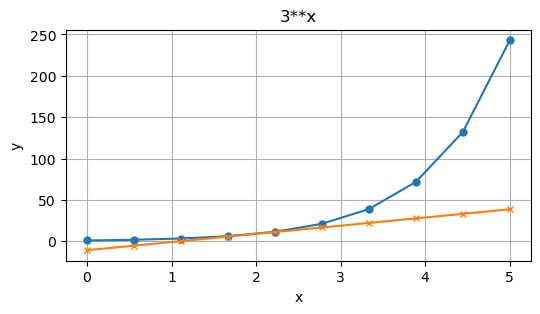

In [4]:
import sympy as sp
from sympy.abc import x
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

f = sp.Lambda(x, 3 ** x)
print(f)

x_values = np.linspace(0, 5, 10)
print(f"x:{x_values}")


def map_x_values(x_value):
    result = f(x_value)
    if result == sp.zoo:
        return np.inf
    return result


y_values = list(map(map_x_values, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime}")

x_at = 2


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5, label="f′")
axes.plot(x_values, y_tangent, marker="x", markersize=5, label="f′′")
plt.show()